<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covid19_casos_comparacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de dados dos casos confirmados da COVID-19**

###**Paises analisados:**

- Brasil;
- China;
- Itália;
- Estados Unidos;
- Índia.

###**Objetivos**

- Verificar a curva de acumulo de casos da covid-19;
- Observar o acumulo individual nos casos confirmados de cada país da lista;
- Observar a comparação entre os número de infectados dos países em uma unica visualização.

**Fonte:** https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [1]:
import pandas as pd

In [2]:
#Importando o dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

casos_globais = pd.read_csv(url)

In [3]:
#Mostrando o dataframe
casos_globais.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518


In [4]:
#Mostrando os tipos das colunas do dataframe
casos_globais.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
4/15/21             int64
4/16/21             int64
4/17/21             int64
4/18/21             int64
4/19/21             int64
Length: 458, dtype: object

In [5]:
#Eliminando as colunas de latitude e longitude
casos_globais = casos_globais.drop(['Lat', 'Long'], axis=1)

In [6]:
#Mostrando o dataframe sem latitude e longitude
casos_globais.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518


In [7]:
#Eliminando a divisão por provincias de países do dataframe
casos_globais = casos_globais.groupby('Country/Region').sum()

In [8]:
casos_globais.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518


In [9]:
import matplotlib.pyplot as plt

In [10]:
#Função para plotagem de graficos de linhas
def Grafico_de_linha(data, casos, pais):
    titulo = 'Total de casos confirmados da COVID-19 no(a)'+ ' ' + pais
    plt.figure(figsize = (18,7))
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 60)
    plt.title(titulo,
              position=(0.5, 1.02),
              fontdict={'family': 'sans serif',
                        'color' : 'black',
                        'weight': 'bold',
                        'size': 18})
    plt.xlabel('Data mm/dd/aa',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.ylabel('Número de casos confirmados',
               fontdict={'family': 'sans serif',
                         'color' : 'black',
                         'weight': 'bold',
                         'size': 12})
    plt.plot(data, casos)
    plt.show()

# **Dados Brasil**

In [11]:
#Criando uma serie apenas com as imformações do Brasil
casos_brasil = casos_globais.loc['Brazil']

In [12]:
casos_brasil.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: Brazil, dtype: int64

In [13]:
#Comprimindo o dataframe para conter apenas as informações de 10 em 10 dias
casos_brasil = casos_brasil.loc[::10]

In [14]:
#Aribuindo a listas separadas as informações de data(data) e numeros de casos confirmados por data(casos) 
data_br = casos_brasil.index
casos_br = casos_brasil.values

In [15]:
#A lista 'data' recebeu os valores de index do dataframe 'casos_brasil'
data_br

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21'],
      dtype='object')

In [16]:
#A lista 'casos' recebeu os valores contidos no dataframe 'casos_brasil'
casos_br

array([       0,        0,        0,        0,        2,       52,
           1546,     6836,    20727,    43079,    92202,   169594,
         310087,   514849,   772416,  1067579,  1402041,  1800827,
        2118646,  2610102,  3035422,  3456652,  3846153,  4162073,
        4495183,  4745464,  5028444,  5224362,  5468270,  5653561,
        5911758,  6238350,  6623911,  7110434,  7484285,  7873830,
        8455059,  8933356,  9447165,  9866710, 10390461, 11019344,
       11693838, 12490362, 13100580, 13832455])

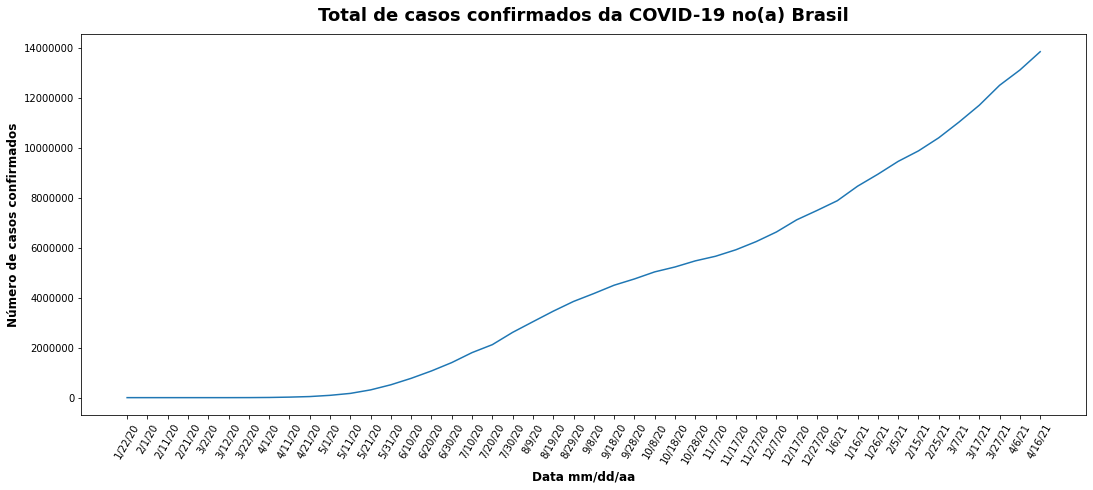

In [17]:
Grafico_de_linha(data_br, casos_br, 'Brasil')

# **Dados China**

In [18]:
casos_china = casos_globais.loc['China']

In [19]:
casos_china.describe()

count       454.000000
mean      86771.612335
std       17370.346995
min         548.000000
25%       84031.250000
50%       90016.500000
75%       95609.250000
max      102264.000000
Name: China, dtype: float64

In [20]:
casos_china = casos_china.loc[::10]
data_ch = casos_china.index
casos_ch = casos_china.values

In [21]:
data_ch

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21'],
      dtype='object')

In [22]:
casos_ch

array([   548,  11891,  44386,  75550,  80136,  80932,  81435,  82361,
        83014,  83853,  83959,  84011,  84063,  84146,  84209,  84553,
        84785,  84992,  85622,  87489,  88793,  89527,  89863,  90087,
        90311,  90505,  90728,  90972,  91271,  91622,  91885,  92586,
        93670,  94734,  95632,  96398,  97775,  99541, 100318, 100624,
       100851, 101132, 101460, 101663, 101920, 102167])

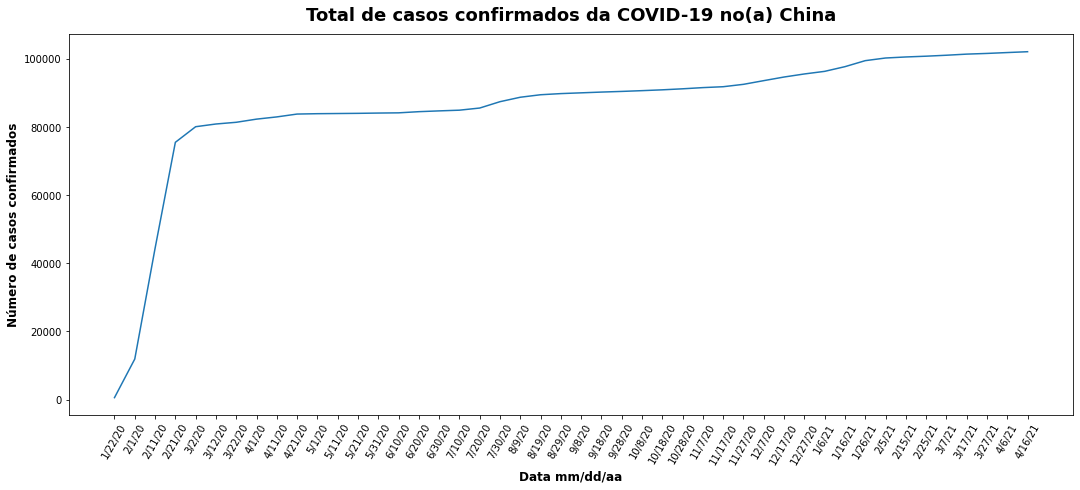

In [23]:
Grafico_de_linha(data_ch, casos_ch, 'China')

# **Dados Itália**

In [24]:
casos_italia = casos_globais.loc['Italy']
casos_italia = casos_italia.loc[::10]
data_it = casos_italia.index
casos_it = casos_italia.values

In [25]:
data_it

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21'],
      dtype='object')

In [26]:
casos_it

array([      0,       2,       3,      20,    2036,   15113,   59138,
        110574,  152271,  183957,  207428,  219814,  228006,  232997,
        235763,  238275,  240578,  242639,  244624,  247158,  250566,
        255278,  266853,  280153,  294932,  311364,  338398,  414241,
        589766,  902490, 1238072, 1538217, 1742557, 1906377, 2047696,
       2201945, 2368733, 2485956, 2611659, 2729223, 2868435, 3067486,
       3281810, 3512453, 3686707, 3842079])

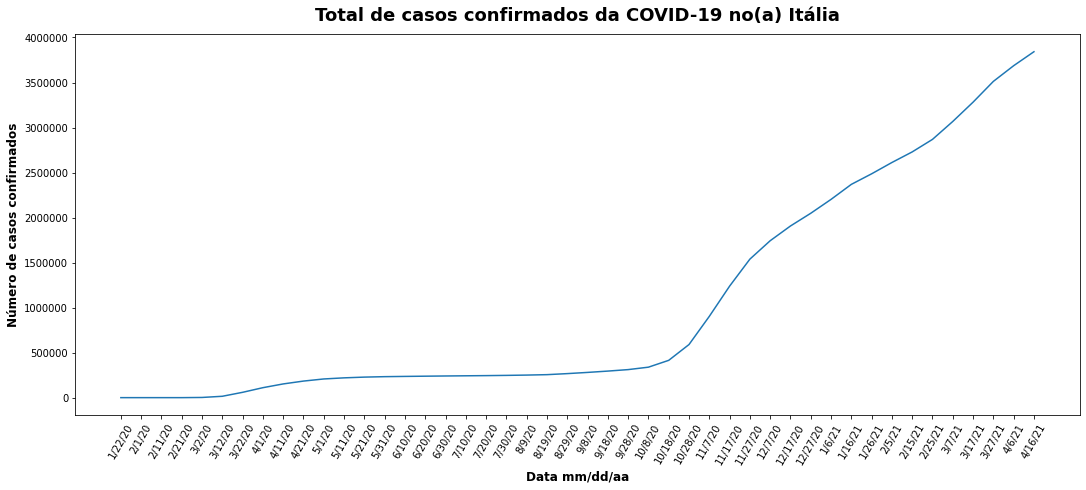

In [27]:
Grafico_de_linha(data_it, casos_it, 'Itália')

# **Dados Estados Unidos**

In [28]:
casos_estados_unidos = casos_globais.loc['US']
casos_estados_unidos = casos_estados_unidos.loc[::10]
data_us = casos_estados_unidos.index
casos_us = casos_estados_unidos.values

In [29]:
data_us

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21'],
      dtype='object')

In [30]:
casos_us

array([       1,        8,       13,       16,       55,     1586,
          34898,   224560,   544183,   825429,  1115946,  1358293,
        1587596,  1798718,  2000757,  2255823,  2642174,  3192841,
        3839546,  4498701,  5046463,  5529973,  5957126,  6329593,
        6730288,  7152546,  7614653,  8165858,  8885632,  9972308,
       11471155, 13213995, 15108918, 17322981, 19255126, 21436884,
       23836726, 25503621, 26877601, 27764087, 28455466, 29064938,
       29610445, 30221396, 30847348, 31575640])

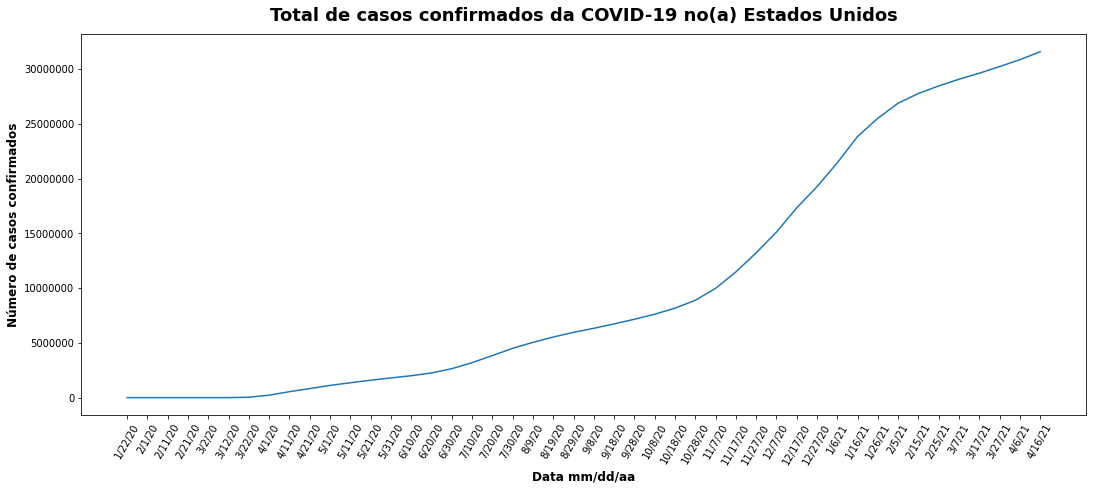

In [31]:
Grafico_de_linha(data_us, casos_us, 'Estados Unidos')

# **Dados Índia**

In [32]:
casos_india = casos_globais.loc['India']
casos_india = casos_india.loc[::10]
data_id = casos_india.index
casos_id = casos_india.values

In [33]:
casos_id

array([       0,        1,        3,        3,        5,       73,
            396,     1998,     8446,    20080,    37257,    70768,
         118226,   190609,   286605,   410451,   585481,   820916,
        1155338,  1634746,  2215074,  2836925,  3542733,  4370128,
        5308014,  6145291,  6906151,  7550273,  8040203,  8507754,
        8912907,  9351109,  9703770,  9979447, 10207871, 10395278,
       10557985, 10689527, 10814304, 10925710, 11063491, 11229398,
       11474605, 11971624, 12801785, 14526609])

In [34]:
data_id

Index(['1/22/20', '2/1/20', '2/11/20', '2/21/20', '3/2/20', '3/12/20',
       '3/22/20', '4/1/20', '4/11/20', '4/21/20', '5/1/20', '5/11/20',
       '5/21/20', '5/31/20', '6/10/20', '6/20/20', '6/30/20', '7/10/20',
       '7/20/20', '7/30/20', '8/9/20', '8/19/20', '8/29/20', '9/8/20',
       '9/18/20', '9/28/20', '10/8/20', '10/18/20', '10/28/20', '11/7/20',
       '11/17/20', '11/27/20', '12/7/20', '12/17/20', '12/27/20', '1/6/21',
       '1/16/21', '1/26/21', '2/5/21', '2/15/21', '2/25/21', '3/7/21',
       '3/17/21', '3/27/21', '4/6/21', '4/16/21'],
      dtype='object')

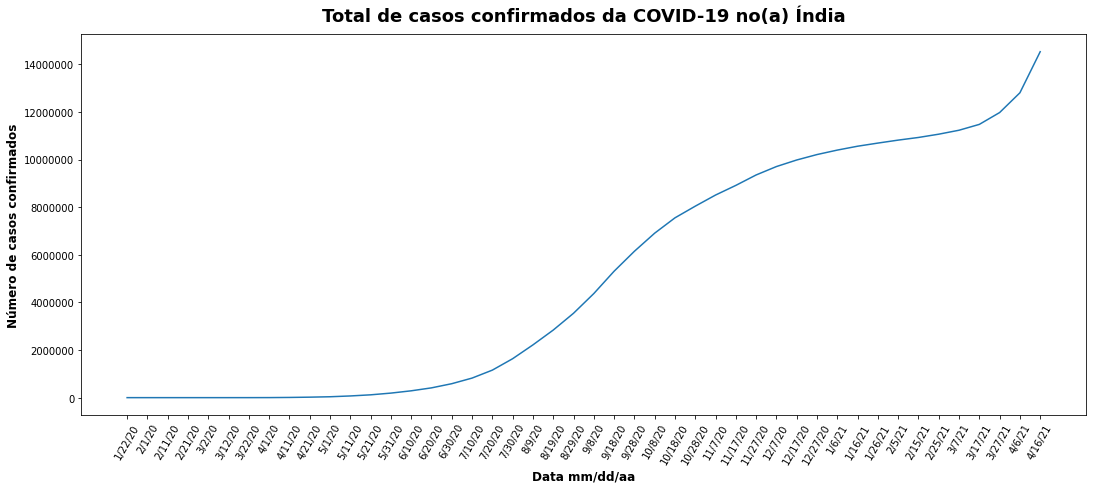

In [35]:
Grafico_de_linha(data_id, casos_id, 'Índia')

# **Comparando os países**

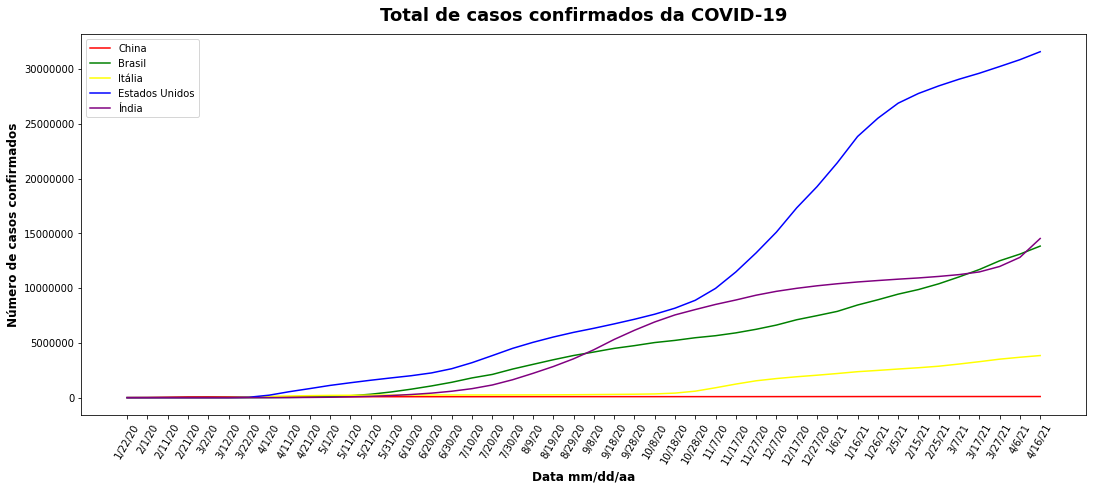

In [36]:
plt.figure(figsize = (18,7))
plt.ticklabel_format(style = 'plain')
plt.xticks(rotation = 60)
plt.title('Total de casos confirmados da COVID-19',
          position=(0.5, 1.02),
          fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 18})
plt.xlabel('Data mm/dd/aa',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.ylabel('Número de casos confirmados',
           fontdict={'family': 'sans serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12})
plt.plot(data_ch, casos_ch, color = 'red')
plt.plot(casos_br, color = 'green')
plt.plot(casos_it, color = 'yellow')
plt.plot(casos_us, color = 'blue')
plt.plot(casos_id, color = 'purple')
plt.legend(['China', 'Brasil', 'Itália', 'Estados Unidos', 'Índia'])
plt.show()